## 피마인디언 당뇨병 사례

In [2]:
import numpy as np
import pandas as pd 
df = pd.read_csv('dataset/pima-indians-diabetes.csv',
                 names = ["pregnant", "plasma", "pressure", "thickness",  
                 "insulin", "BMI", "pedigree", "age", "class"])
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df[['pregnant', 'class']].head(10)

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
5,5,0
6,3,1
7,10,0
8,2,1
9,8,1


In [6]:
# 임신 횟수와 당뇨병 발병 확률
df[['pregnant','class']].groupby(['pregnant'], 
    as_index=False).mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

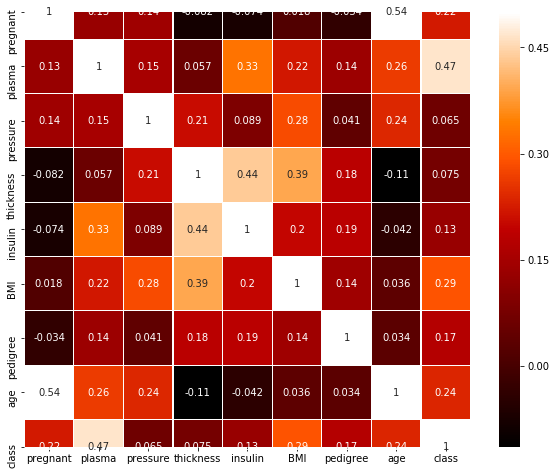

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, 
            linecolor='white', annot=True)
plt.show()

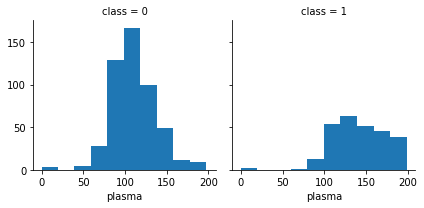

In [12]:
# 공복혈당(plasma)과 당뇨병과의 관계
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# seed 값 생성
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [15]:
# 데이터 로드
dataset = np.loadtxt("dataset/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

In [16]:
# 딥러닝 모델 설정
model = Sequential([
    Dense(12, input_shape=(8,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 1s 1ms/sample - loss: 7.1648 - accuracy: 0.6237
Epoch 2/200
768/768 [==============================] - 0s 234us/sample - loss: 2.1937 - accuracy: 0.6484
Epoch 3/200
768/768 [==============================] - 0s 225us/sample - loss: 1.3965 - accuracy: 0.6055
Epoch 4/200
768/768 [==============================] - 0s 230us/sample - loss: 1.0761 - accuracy: 0.6042
Epoch 5/200
768/768 [==============================] - 0s 240us/sample - loss: 0.8785 - accuracy: 0.6159
Epoch 6/200
768/768 [==============================] - 0s 235us/sample - loss: 0.7622 - accuracy: 0.6250
Epoch 7/200
768/768 [==============================] - 0s 234us/sample - loss: 0.7004 - accuracy: 0.6458
Epoch 8/200
768/768 [==============================] - 0s 231us/sample - loss: 0.6869 - accuracy: 0.6406
Epoch 9/200
768/768 [==============================] - 0s 232us/sample - loss: 0.6744 - accuracy: 0.6432
Epoch 10/200
768/768 [==============

768/768 [==============================] - 0s 306us/sample - loss: 0.5019 - accuracy: 0.7526
Epoch 155/200
768/768 [==============================] - 0s 294us/sample - loss: 0.4975 - accuracy: 0.7656
Epoch 156/200
768/768 [==============================] - 0s 275us/sample - loss: 0.4968 - accuracy: 0.7656
Epoch 157/200
768/768 [==============================] - 0s 267us/sample - loss: 0.4951 - accuracy: 0.7656
Epoch 158/200
768/768 [==============================] - 0s 275us/sample - loss: 0.4957 - accuracy: 0.7695
Epoch 159/200
768/768 [==============================] - 0s 283us/sample - loss: 0.4954 - accuracy: 0.7656
Epoch 160/200
768/768 [==============================] - 0s 279us/sample - loss: 0.4981 - accuracy: 0.7656
Epoch 161/200
768/768 [==============================] - 0s 287us/sample - loss: 0.4936 - accuracy: 0.7656
Epoch 162/200
768/768 [==============================] - 0s 275us/sample - loss: 0.5020 - accuracy: 0.7643
Epoch 163/200
768/768 [============================

In [19]:
# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=0)[1]))


 Accuracy: 0.7721
